In [1]:
from random import randint

import networkx as nx
import pandas as pd
import torch
from matplotlib import pyplot as plt
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

from datetime import datetime

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.nn as nng
import numpy as np

import random

from Dimploma.EnvironmentTree import EnvMinimalTreeTwoStep, EnvMinimalTreeTwoStepHeur, EnvInfo
from Dimploma.util import show_data, generate_random_full_graph, generate_random_graph_add_method, show_graph
import Dimploma.util as util
from Dimploma.utils.graph_provider import GraphProvider


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib qt

In [4]:
node_amount = 10
edge_amount = int(torch.sum(torch.arange(node_amount)).item()*0.75)
edge_value_min = 1
edge_value_max = 10

In [4]:
int(torch.sum(torch.arange(node_amount)).item()*0.75)

33

In [ ]:


x = torch.arange(node_amount)
parent = torch.arange(node_amount)
edge_index = torch.zeros((edge_amount, 2))
edges_attr = torch.zeros((edge_amount, 2))
edges_weight = torch.zeros(edge_amount)
e = 0

# make a basic tree
while not torch.all(parent == parent[0]):
    mask = parent == parent[0]

    from_nodes = x[mask]
    to_nodes = x[~mask]
    
    random_from = from_nodes[random.randint(0, from_nodes.shape[0] - 1)]
    random_to = to_nodes[random.randint(0, to_nodes.shape[0] - 1)]
    
    edge_index[e] = torch.tensor([random_from, random_to])
    edges_weight[e] = randint(edge_value_min, edge_value_max)
    edges_attr[e, 0] = edges_weight[e]
    edges_attr[e, 1] = 0
    e += 1
    parent[random_to] = parent[random_from]

# fill out the rest with random picks
while e < edge_amount:
    
    node_from = random.randint(0, node_amount - 1)
    
    possibilities = torch.arange(node_amount)
    
    # filter out self loops
    possibilities = possibilities[possibilities != node_from]
    
    # filter out already existing edges
    banned_nodes1 = edge_index[edge_index[:, 0] == node_from, 1]
    banned_nodes2 = edge_index[edge_index[:, 1] == node_from, 0] 
    mask = torch.logical_not(torch.any(possibilities.unsqueeze(1) == torch.unique(torch.cat((banned_nodes1, banned_nodes2))), dim=1))
    
    possibilities = possibilities[mask]
    
    if possibilities.shape[0] > 0:
        # pick one and create edge
        node_to = random.randint(0, possibilities.shape[0] - 1)
        edge_index[e] = torch.tensor([node_from, possibilities[node_to]])
        edges_weight[e] = randint(edge_value_min, edge_value_max)
        edges_attr[e, 0] = edges_weight[e]
        edges_attr[e, 1] = 0
        
        e += 1

graph = Data(x=x, edge_index=edge_index.T, edge_attr=edges_attr, edge_weight=edges_weight)
show_data(graph)

In [ ]:
# show_data(generate_random_graph_2(node_amount, edge_amount, edge_value_min, edge_value_max))

In [ ]:
graph_test = generate_random_full_graph(10)
graph_test, graph_test.x, graph_test.edge_index, graph_test.edge_attr, graph_test.edge_weight

In [20]:
x = torch.zeros((node_amount, 2))
edges = torch.zeros((2, edge_amount), dtype=torch.int64)
edges_attr = torch.zeros((edge_amount, 3), dtype=torch.float32)
edges_weight = torch.zeros(edge_amount, dtype=torch.float32)

for i in range(node_amount):
    x[i, 0] = i
edges[0, 0] = 5
edges[1, 0] = 0
edges_weight[0] = 10
edges[0, 1] = 5
edges[1, 1] = 1
edges_weight[1] = 10
edges[0, 2] = 5
edges[1, 2] = 2
edges_weight[2] = 10
edges[0, 3] = 5
edges[1, 3] = 3
edges_weight[3] = 10
edges[0, 4] = 5
edges[1, 4] = 4
edges_weight[4] = 10
edges[0, 5] = 5
edges[1, 5] = 6
edges_weight[5] = 10
edges[0, 6] = 5
edges[1, 6] = 7
edges_weight[6] = 10
edges[0, 7] = 5
edges[1, 7] = 8
edges_weight[7] = 9
edges[0, 8] = 5
edges[1, 8] = 9
edges_weight[8] = 10
edges[0, 9] = 0
edges[1, 9] = 1
edges_weight[9] = 2
edges[0, 10] = 1
edges[1, 10] = 2
edges_weight[10] = 5
edges[0, 11] = 2
edges[1, 11] = 3
edges_weight[11] = 2
edges[0, 12] = 3
edges[1, 12] = 4
edges_weight[12] = 2
edges[0, 13] = 4
edges[1, 13] = 6
edges_weight[13] = 4
edges[0, 14] = 6
edges[1, 14] = 7
edges_weight[14] = 2
edges[0, 15] = 7
edges[1, 15] = 8
edges_weight[15] = 1
edges[0, 16] = 8
edges[1, 16] = 9
edges_weight[16] = 7
edges[0, 17] = 9
edges[1, 17] = 0
edges_weight[17] = 8
edges[0, 18] = 1
edges[1, 18] = 8
edges_weight[18] = 1
edges[0, 19] = 2
edges[1, 19] = 8
edges_weight[19] = 1
edges[0, 20] = 3
edges[1, 20] = 6
edges_weight[20] = 1
edges[0, 21] = 4
edges[1, 21] = 7
edges_weight[21] = 7
edges[0, 22] = 6
edges[1, 22] = 8
edges_weight[22] = 1
edges[0, 23] = 7
edges[1, 23] = 9
edges_weight[23] = 8
edges[0, 24] = 8
edges[1, 24] = 0
edges_weight[24] = 1
edges[0, 25] = 9
edges[1, 25] = 1
edges_weight[25] = 8
edges[0, 26] = 0
edges[1, 26] = 2
edges_weight[26] = 2
edges[0, 27] = 0
edges[1, 27] = 3
edges_weight[27] = 2
edges[0, 28] = 1
edges[1, 28] = 4
edges_weight[28] = 7
edges[0, 29] = 2
edges[1, 29] = 6
edges_weight[29] = 8
edges[0, 30] = 3
edges[1, 30] = 7
edges_weight[30] = 2
edges[0, 31] = 4
edges[1, 31] = 8
edges_weight[31] = 1
edges[0, 32] = 6
edges[1, 32] = 9
edges_weight[32] = 8

edges_attr[:, 2] = edges_weight[:]

max_distance = torch.max(edges_attr[:, 2])
edges_attr[:, 0] = edges_attr[:, 2] / max_distance

res_graph_bad = Data(x=x, edge_index=edges, edge_attr=edges_attr, edge_weight=edges_weight)
torch.save(res_graph_bad, f'../graphs/graph13_n{node_amount}_e{edge_amount}_custom_bad2fix.pt')

res_graph_bad, res_graph_bad.x, res_graph_bad.edge_index, res_graph_bad.edge_attr, res_graph_bad.edge_weight

(Data(x=[10, 2], edge_index=[2, 33], edge_attr=[33, 3], edge_weight=[33]),
 tensor([[0., 0.],
         [1., 0.],
         [2., 0.],
         [3., 0.],
         [4., 0.],
         [5., 0.],
         [6., 0.],
         [7., 0.],
         [8., 0.],
         [9., 0.]]),
 tensor([[5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 1, 2, 3, 4, 6, 7, 8, 9, 1, 2, 3, 4, 6, 7,
          8, 9, 0, 0, 1, 2, 3, 4, 6],
         [0, 1, 2, 3, 4, 6, 7, 8, 9, 1, 2, 3, 4, 6, 7, 8, 9, 0, 8, 8, 6, 7, 8, 9,
          0, 1, 2, 3, 4, 6, 7, 8, 9]]),
 tensor([[ 1.0000,  0.0000, 10.0000],
         [ 1.0000,  0.0000, 10.0000],
         [ 1.0000,  0.0000, 10.0000],
         [ 1.0000,  0.0000, 10.0000],
         [ 1.0000,  0.0000, 10.0000],
         [ 1.0000,  0.0000, 10.0000],
         [ 1.0000,  0.0000, 10.0000],
         [ 0.9000,  0.0000,  9.0000],
         [ 1.0000,  0.0000, 10.0000],
         [ 0.2000,  0.0000,  2.0000],
         [ 0.5000,  0.0000,  5.0000],
         [ 0.2000,  0.0000,  2.0000],
         [ 0.2000,  0.0000,  2.0000

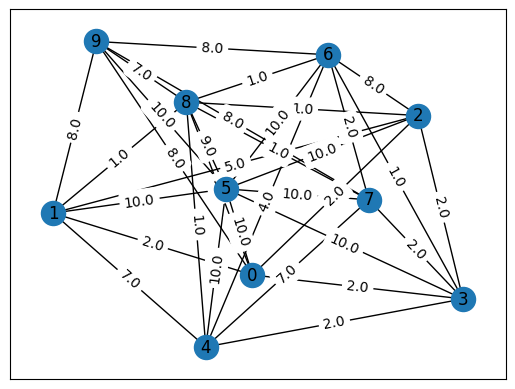

In [17]:
show_data(res_graph_bad)

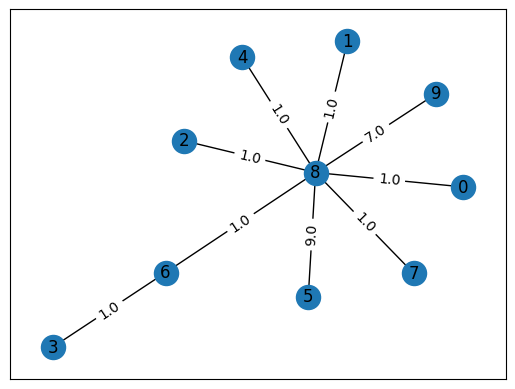

In [18]:
graph_provider = GraphProvider(res_graph_bad)
test_env = EnvMinimalTreeTwoStep(graph_provider)
show_data(test_env.min_tree)
# test_env.min_tree

In [19]:
torch.cat([util.get_node_sums(res_graph_bad).T, util.get_out_edges(res_graph_bad).T], dim=1).T

tensor([[3.0000, 8.0000, 0.0000, 2.0000, 7.0000, 4.0000, 1.0000, 6.0000, 9.0000,
         5.0000],
        [1.9000, 2.2000, 2.5000, 2.8000, 3.0000, 3.1000, 3.3000, 3.4000, 4.9000,
         8.9000],
        [0.0000, 1.0000, 2.0000, 3.0000, 4.0000, 7.0000, 9.0000, 6.0000, 8.0000,
         5.0000],
        [6.0000, 6.0000, 6.0000, 6.0000, 6.0000, 6.0000, 6.0000, 7.0000, 8.0000,
         9.0000]])

In [ ]:
for i in range(33):
    print(f'edges[0, {i}] = ')
    print(f'edges[1, {i}] = ')
    print(f'edges_weight[{i}] = ')
    # print('')

In [9]:

# loaded_graph = torch.load('../graphs/graph42_n10_e33_heur_rew2.pt', map_location='cpu', weights_only=False)
loaded_graph = torch.load('../graphs/graph10_n10_e33_custom_bad.pt', map_location='cpu', weights_only=False)
graph_provider = GraphProvider(loaded_graph)
test_env = EnvMinimalTreeTwoStepHeur(EnvInfo(graph_provider))
test_env.calculate_min_span_tree()

9.0

In [11]:
show_data(test_env.graph)
# show_data(test_env.min_tree)

In [7]:
torch.cat([test_env.matrix.clone().cpu().flatten(), test_env.graph.edge_attr[:, 1]])

tensor([0.0000, 0.3000, 0.0000, 0.4000, 1.0000, 0.8000, 0.4000, 0.7000, 0.2000,
        0.1000, 0.3000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.3000, 0.2000, 0.0000, 0.0000, 0.0000, 0.3000, 0.8000, 0.7000, 0.4000,
        0.0000, 1.0000, 0.5000, 0.4000, 1.0000, 0.3000, 0.0000, 0.3000, 0.2000,
        0.0000, 0.1000, 0.0000, 0.0000, 1.0000, 0.0000, 0.8000, 0.3000, 0.0000,
        0.2000, 0.9000, 0.3000, 0.8000, 0.1000, 0.8000, 0.0000, 0.7000, 0.2000,
        0.2000, 0.0000, 0.1000, 0.9000, 0.5000, 0.2000, 0.4000, 0.0000, 0.4000,
        0.0000, 0.9000, 0.1000, 0.0000, 0.2000, 0.1000, 0.8000, 0.7000, 0.0000,
        0.0000, 0.1000, 0.3000, 0.9000, 0.2000, 0.0000, 0.0000, 0.9000, 0.2000,
        0.3000, 1.0000, 0.0000, 0.8000, 0.5000, 0.1000, 0.0000, 0.0000, 0.0000,
        0.1000, 0.2000, 0.5000, 0.0000, 0.1000, 0.2000, 0.8000, 0.9000, 0.0000,
        0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
        1.0000, 1.0000, 0.0000, 0.0000, 

In [6]:
test_env.reset()
test_env.step(9)
_, _, rew1, _, _ = test_env.step(0)
test_env.step(9)
_, _, rew2, _, _ = test_env.step(4)
test_env.step(8)
_, _, rew3, _, _ = test_env.step(6)
test_env.step(6)
_, _, rew4, _, _ = test_env.step(5)
test_env.step(3)
_, _, rew5, _, _ = test_env.step(7)
test_env.step(9)
_, _, rew6, _, _ = test_env.step(1)

test_env.step(0)
_, _, rew7, _, _ = test_env.step(8)
test_env.step(5)
_, _, rew8, _, _ = test_env.step(3)
test_env.step(2)
_, _, rew9, _, _ = test_env.step(3)

rew9, rew1+rew2+rew3+rew4+rew5+rew6+rew7+rew8+rew9

(1.0, 9.0)

In [20]:
last_step = 6
action = 0


torch.any(((test_env.min_tree.edge_index[0] == last_step) & (test_env.min_tree.edge_index[1] == action)) | \
       ((test_env.min_tree.edge_index[0] == action) & (test_env.min_tree.edge_index[1] == last_step)))

tensor(False)

<BarContainer object of 6 artists>

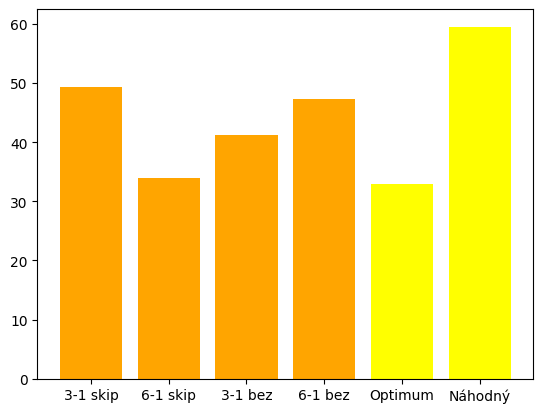

In [30]:

plt.bar(['3-1 skip', '6-1 skip', '3-1 bez', '6-1 bez', 'Optimum', 'Náhodný'], [49.38, 33.94, 41.15, 47.35, 33.0, 59.51], color=['orange', 'orange', 'orange', 'orange', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'red'])

In [9]:

plt.barh(['Rnd Výber', 'Optimum', 'Skip1', 'Skip2', 'Bez Skip1', 'Bez Skip2'], [47.22, 21.0, 22.56, 45.71, 46.51, 21.63], color=['red', 'green', 'orange', 'orange', 'yellow', 'yellow'])

<BarContainer object of 6 artists>

<BarContainer object of 4 artists>

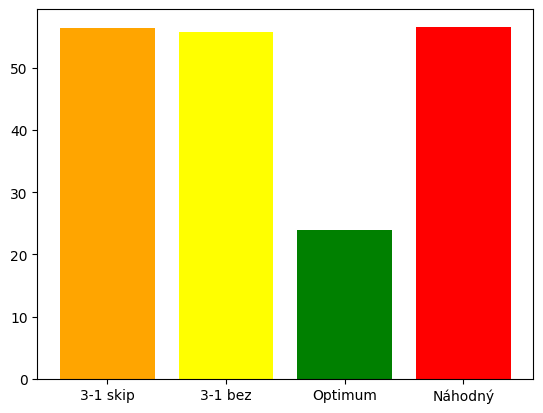

In [15]:

plt.bar(['3-1 skip', '3-1 bez', 'Optimum', 'Náhodný'], [56.42, 55.83, 24.0, 56.63], color=['orange', 'yellow', 'green', 'red'])

In [14]:
loaded_graph.edge_index

tensor([[0, 0, 0, 9, 8, 9, 2, 2, 9, 2, 3, 2, 9, 9, 7, 5, 3, 1, 9, 1, 9, 5, 6, 4,
         7, 3, 3, 5, 5, 7, 5, 5, 8],
        [8, 2, 9, 3, 1, 7, 4, 5, 6, 7, 8, 8, 8, 5, 0, 8, 4, 9, 4, 7, 2, 0, 8, 8,
         5, 6, 0, 1, 3, 4, 4, 6, 7]])

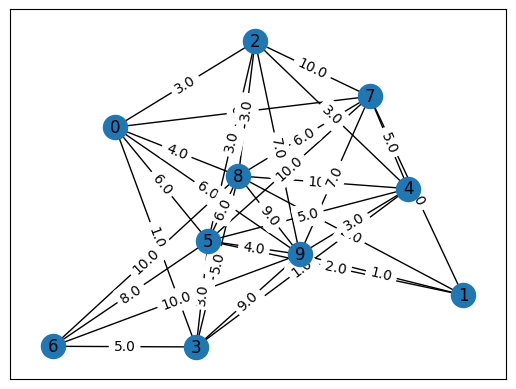

In [101]:
util.show_data(loaded_graph)

In [102]:
test_env.reset()
cl, mask, rew, term, info = test_env.step(3)
test_env.step(4)
test_env.step(3)
test_env.step(9)
mask

tensor([ True, False, False, False,  True,  True,  True, False,  True,  True])

In [104]:
loaded_graph.edge_index

tensor([[0, 0, 0, 9, 8, 9, 2, 2, 9, 2, 3, 2, 9, 9, 7, 5, 3, 1, 9, 1, 9, 5, 6, 4,
         7, 3, 3, 5, 5, 7, 5, 5, 8],
        [8, 2, 9, 3, 1, 7, 4, 5, 6, 7, 8, 8, 8, 5, 0, 8, 4, 9, 4, 7, 2, 0, 8, 8,
         5, 6, 0, 1, 3, 4, 4, 6, 7]])

In [109]:
# loaded_graph.x[mask][:, 0]


temp = test_env.parent[test_env.graph.edge_index]
cycle_mask = temp[0] != temp[1]
edge_values = test_env.graph.edge_weight[cycle_mask]
# torch.sort(edge_values)#, cycle_mask
edge_values.min()

tensor(1.)

In [42]:
# order = torch.argsort(loaded_graph.edge_weight)
last_step = 3
action = 4

index = test_env.find_edge(last_step, action)
order = torch.sort(loaded_graph.edge_weight)
max_r = loaded_graph.edge_weight.max()
min_r = loaded_graph.edge_weight.min()
# rews_ordered = torch.arange(loaded_graph.edge_index[0].shape[0], 0, -1)
# rews_ordered -= loaded_graph.edge_index[0].shape[0] // 2

rews = min_r - loaded_graph.edge_weight + 1

# rews = torch.zeros(loaded_graph.edge_index[0].shape[0], dtype=torch.int64)
# rews[order[1]] = rews_ordered

index, order, rews, rews[index]



(tensor([16]),
 torch.return_types.sort(
 values=tensor([ 1.,  1.,  1.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,
          5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  7.,  7.,  8.,  9.,  9.,  9.,
         10., 10., 10., 10., 10.]),
 indices=tensor([16, 17, 26,  4, 27,  1, 19, 18,  6,  7, 28, 11,  0, 13, 25, 10, 29, 30,
          2, 15, 21, 32,  5, 20, 31,  3, 14, 12, 22, 23, 24,  9,  8])),
 tensor([-2., -1., -4., -7.,  0., -5., -1., -1., -8., -8., -3., -1., -7., -2.,
         -7., -4.,  1.,  1., -1., -1., -5., -4., -8., -8., -8., -3.,  1.,  0.,
         -1., -3., -3., -6., -4.]),
 tensor([1.]))

In [5]:
data = generate_random_graph_add_method(node_amount, edge_amount)

matrix = torch.zeros((data.x.shape[0], data.x.shape[0]))

In [21]:
matrix[data.edge_index[0], data.edge_index[1]] = data.edge_weight
matrix[data.edge_index[1], data.edge_index[0]] = data.edge_weight

In [15]:
data.edge_index.T[0], matrix[0, 7]

(tensor([0, 7]), tensor(0.))

In [28]:
torch.cat([data.edge_index, data.edge_weight.unsqueeze(0)])
# data.edge_index.unsqueeze(0)

tensor([[ 0.,  7.,  0.,  6.,  0.,  7.,  7.,  4.,  3.,  7.,  1.,  8.,  2.,  6.,
          3.,  1.,  6.,  9.,  5.,  4.,  5.,  0.,  6.,  3.,  1.,  2.,  0.,  4.,
          0.,  3.,  6.,  3.,  6.],
        [ 7.,  4.,  6.,  2.,  9.,  5.,  8.,  3.,  1.,  6.,  8.,  0.,  8.,  8.,
          8.,  2.,  3.,  7.,  4.,  1.,  9.,  2.,  9.,  0.,  9.,  9.,  5.,  6.,
          4.,  9.,  1.,  2.,  5.],
        [ 8.,  8.,  2.,  5.,  8.,  6.,  2.,  6.,  5.,  6., 10.,  3.,  8.,  8.,
          2.,  9.,  1.,  4.,  5.,  8.,  5.,  7., 10.,  7.,  7.,  1.,  9.,  6.,
          8.,  8.,  9.,  5.,  9.]])

In [6]:
graph = loaded_graph

In [39]:
x = torch.arange(graph.x.shape[0] + graph.edge_index.shape[1], device=graph.x.device)
x[graph.x.shape[0]:] = -x[graph.x.shape[0]:] + 9
x = torch.stack([x, torch.zeros(x.shape[0])])
x[1, graph.x.shape[0]:] = graph.edge_attr[:,0]

edge_index = torch.zeros((2, graph.edge_index.shape[1] * 2), device=graph.x.device, dtype=torch.int64)
edge_index[0, :graph.edge_index.shape[1]] = graph.edge_index[0, :]
edge_index[0, graph.edge_index.shape[1]:] = x[0, graph.x.shape[0]:]
edge_index[1, :graph.edge_index.shape[1]] = x[0, graph.x.shape[0]:]
edge_index[1, graph.edge_index.shape[1]:] = graph.edge_index[1, :]


# edges_attr = torch.zeros((max_edge_amount, 3), device=graph.x.device, dtype=torch.float32)
# edges_weight = torch.zeros(max_edge_amount, device=graph.x.device, dtype=torch.float32)
x, edge_index, graph.edge_index

(tensor([[  0.0000,   1.0000,   2.0000,   3.0000,   4.0000,   5.0000,   6.0000,
            7.0000,   8.0000,   9.0000,  -1.0000,  -2.0000,  -3.0000,  -4.0000,
           -5.0000,  -6.0000,  -7.0000,  -8.0000,  -9.0000, -10.0000, -11.0000,
          -12.0000, -13.0000, -14.0000, -15.0000, -16.0000, -17.0000, -18.0000,
          -19.0000, -20.0000, -21.0000, -22.0000, -23.0000, -24.0000, -25.0000,
          -26.0000, -27.0000, -28.0000, -29.0000, -30.0000, -31.0000, -32.0000,
          -33.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000,   0.7000,   0.2000,   0.5000,   0.4000,
            0.2000,   0.3000,   0.2000,   0.3000,   0.1000,   0.1000,   0.8000,
            0.3000,   0.5000,   0.9000,   1.0000,   0.1000,   1.0000,   0.2000,
            0.1000,   1.0000,   0.8000,   0.3000,   0.3000,   0.7000,   0.8000,
            0.9000,   0.4000,   0.9000,   0.8000,   0.4000,   0.1000,   0.2000,
            0.2000]

In [5]:
torch.sum(torch.arange(5)).item()

10

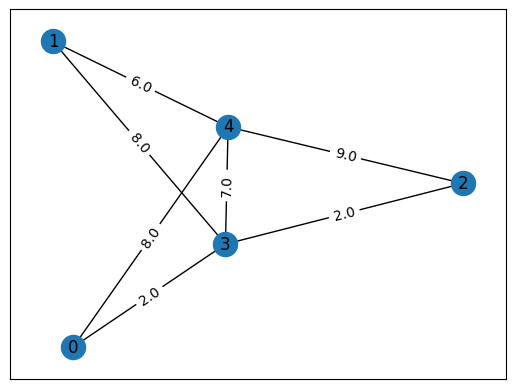

In [12]:
dipl_graph = util.generate_random_graph_add_method(5, 7)
util.show_data(dipl_graph)

In [21]:
gr = util.my_to_networkx(dipl_graph)
gr.edges()

EdgeView([(0, 3), (0, 4), (1, 4), (1, 3), (2, 3), (2, 4), (3, 4)])

In [28]:
gr_pos = nx.spring_layout(gr)

In [45]:
%matplotlib qt
# %matplotlib inline
widths = [5, 5, 1, 1, 1, 1, 5]
with_labels = False

nx.draw_networkx(gr, gr_pos, with_labels=True)
gr_labels = nx.get_edge_attributes(gr, 'edge_weight')
if widths is not None:
    nx.draw_networkx_edges(gr, gr_pos, width=widths)
if with_labels:
    nx.draw_networkx_edge_labels(gr, gr_pos, edge_labels=gr_labels)

plt.show()

# util.show_graph(gr, [1, 1, 1, 1, 5, 5, 1], False)

In [44]:
podgr = gr.copy()
podgr.add_edge(1, 0)
podgr.add_edge(2, 0)
podgr.add_edge(1, 2)
podgr.add_edge(1, 0)
# podgr.remove_edge(2, 4)
# podgr.remove_edge(0, 4)
# podgr.remove_node(4)
nx.draw_networkx(podgr, gr_pos, with_labels=True)
podgr